In [128]:
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import decomposition, ensemble

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn import feature_selection

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import Feature_Extraction as fe

In [3]:
# load the dataset

data = open('data/tousend_cons_rels.CSV', encoding="ANSI").read()
label, r1, r2, rmix = [], [], [], []
size = 500
for i, line in enumerate(data.split("\n")):
    if i >= size:
        break
    if line != '' and line.isspace() != True:
        content = line.split(';')
        label.append(content[0])
        r1.append(content[1])
        r2.append(content[2])
        rmix.append(content[1]+content[2])
        
index = 0
size = len(label)
x = []
while index < size:
    x.append(fe.createFBag(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()

xx = vec.fit_transform(x).toarray()

yy = []
for l in label:
    if l == 'true':
        yy.append(1)
    else:
        yy.append(-1)

Optimal number of features : 9


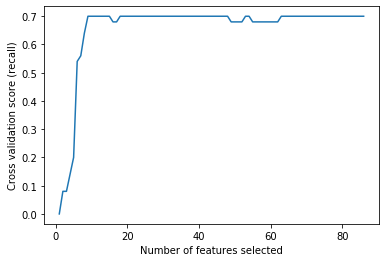

In [6]:
#feature evaluation based on recall
clf = SVC(kernel='linear', C=1)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10),scoring='recall')
rfecv.fit(xx, yy)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'prec

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'prec

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'prec

Optimal number of features : 22


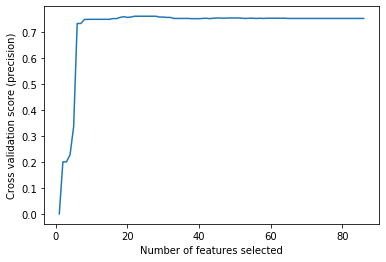

In [7]:
#feature evaluation based on precision
clf = SVC(kernel='linear', C=1)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10),scoring='precision')
rfecv.fit(xx, yy)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (precision)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [8]:
x_NoOVLAP = []
x_NoSUBJOBJ = []
x_NoModal = []
for index in range(len(label)):
    x_NoOVLAP.append(fe.createFBagNoOVLAP(r1[index], r2[index]))
    x_NoSUBJOBJ.append(fe.createFBagNoSUBJOBJ(r1[index], r2[index]))
    x_NoModal.append(fe.createFBagNoModal(r1[index], r2[index]))
    index = index + 1
    
vec = DictVectorizer()
xx_NoOVLAP = vec.fit_transform(x_NoOVLAP).toarray()
xx_NoSUBJOBJ = vec.fit_transform(x_NoSUBJOBJ).toarray()
xx_NoModal = vec.fit_transform(x_NoModal).toarray()

In [12]:
print('Shape of Feature Sets:')
print('All Features --> ', xx.shape)
print('No Overlap Features --> ', xx_NoOVLAP.shape)
print('No Subject-object Features --> ', xx_NoSUBJOBJ.shape)
print('No Modal and Root Features --> ', xx_NoModal.shape)

Shape of Feature Sets:
All Features -->  (500, 86)
No Overlap Features -->  (500, 80)
No Subject-object Features -->  (500, 78)
No Modal and Root Features -->  (500, 14)


In [19]:
print('Example of a feature set BEFORE vectorizing:')
print(x[0])
print()
print('Example of a feature set AFTER vectorizing:')
print(xx[0])

Example of a feature set BEFORE vectorizing:
{'subjsubj': 0.5, 'subjobj': 0, 'objsubj': 0.5, 'objobj': 1, 'asubjsubj': 0, 'asubjobj': 0.5, 'aobjsubj': 0, 'aobjobj': 0.5, 'noun_ovlap_1_2': 0.3, 'noun_ovlap_2_1': 0.3, 'verb_ovlap_1_2': 0.5, 'verb_ovlap_2_1': 0.5, 'M_1': 'obligatory', 'root_1': 'have', 'M_2': 'obligatory', 'root_2': 'be'}

Example of a feature set AFTER vectorizing:
[1.  0.  0.  0.  1.  0.  0.5 0.  0.5 0.  0.3 0.3 1.  0.5 0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.5 0. ]


In [166]:
all_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoOVLAP_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoSUBJOBJ_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoModal_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 10
clf = SVC(kernel='linear', C=1)
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all = cross_validate(clf, X=xx, y=yy, cv=skf, scoring=myscores)
    nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=yy, cv=skf, scoring=myscores)
    nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=yy, cv=skf, scoring=myscores)
    nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=yy, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_scores[scr] = np.concatenate((all_scores[scr], nested_score_all['test_' + scr]), axis=None)
        NoOVLAP_scores[scr] = np.concatenate((NoOVLAP_scores[scr], nested_score_NoOVLAP['test_' + scr]), axis=None)
        NoSUBJOBJ_scores[scr] = np.concatenate((NoSUBJOBJ_scores[scr], nested_score_NoSUBJOBJ['test_' + scr]), axis=None)
        NoModal_scores[scr] = np.concatenate((NoModal_scores[scr], nested_score_NoModal['test_' + scr]), axis=None)

        
        
df = pd.DataFrame({'all_precision':all_scores['precision'], 'all_recall':all_scores['recall'], 'all_f1':all_scores['f1'],
                  'NoOVLAP_precision':NoOVLAP_scores['precision'], 'NoOVLAP_recall':NoOVLAP_scores['recall'], 'NoOVLAP_f1':NoOVLAP_scores['f1'],
                   'NoSUBJOBJ_precision':NoSUBJOBJ_scores['precision'], 'NoSUBJOBJ_recall':NoSUBJOBJ_scores['recall'], 'NoSUBJOBJ_f1':NoSUBJOBJ_scores['f1'],
                   'NoModal_precision':NoModal_scores['precision'], 'NoModal_recall':NoModal_scores['recall'], 'NoModal_f1':NoModal_scores['f1']})

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

Feature Set Evaluation for SVC



------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.8547619047619047, variance=0.034260633546347834, skewness=-1.5299617809975095, kurtosis=3.4322168274764566)
DescribeResult(nobs=100, minmax=(0.3333333333333333, 1.0), mean=0.8894523809523808, variance=0.022107956549623206, skewness=-1.1486509362795427, kurtosis=0.8397596480846361)
DescribeResult(nobs=100, minmax=(0.5, 1.0), mean=0.9259761904761905, variance=0.014899687922306969, skewness=-1.286014721585087, kurtosis=0.3951314794577163)
DescribeResult(nobs=100, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.6979999999999998, variance=0.041612121212121225, skewness=-0.5181883826049388, kurtosis=0.460204295864739)
DescribeResult(nobs=100, minmax=(0.2, 1.0), mean=0.708, variance=0.03751111111111112, skewness=-0.24758032567401916, kurtosis=-0.36750156533057865)
DescribeResult(nobs=

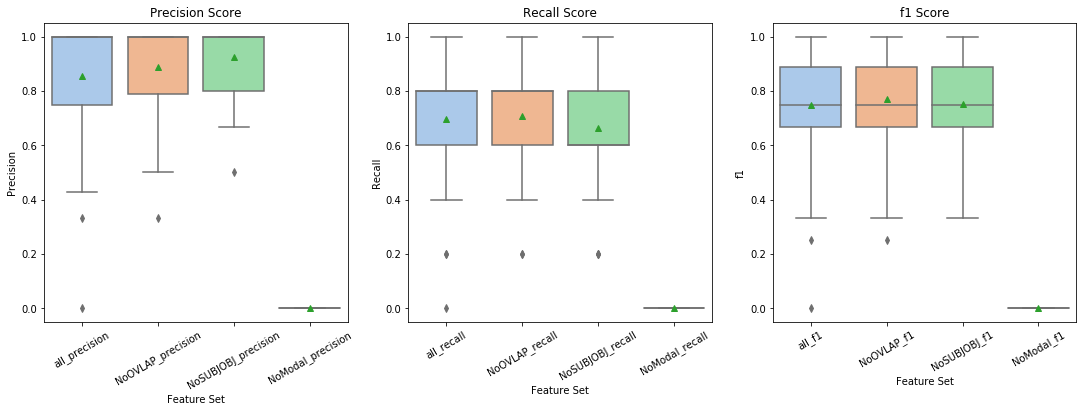

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation for SVC")
print()
print()
print()

print("------------------------")
print()
precision_data = pd.melt(df[['all_precision', 'NoOVLAP_precision', 'NoSUBJOBJ_precision', 'NoModal_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
print(stats.describe(df['all_precision']))
print(stats.describe(df['NoOVLAP_precision']))
print(stats.describe(df['NoSUBJOBJ_precision']))
print(stats.describe(df['NoModal_precision']))
print("------------------------")
print()
recall_data = pd.melt(df[['all_recall', 'NoOVLAP_recall', 'NoSUBJOBJ_recall', 'NoModal_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
print(stats.describe(df['all_recall']))
print(stats.describe(df['NoOVLAP_recall']))
print(stats.describe(df['NoSUBJOBJ_recall']))
print(stats.describe(df['NoModal_recall']))
print("------------------------")
print()
f1_data = pd.melt(df[['all_f1', 'NoOVLAP_f1', 'NoSUBJOBJ_f1', 'NoModal_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
print(stats.describe(df['all_f1']))
print(stats.describe(df['NoOVLAP_f1']))
print(stats.describe(df['NoSUBJOBJ_f1']))
print(stats.describe(df['NoModal_f1']))

In [169]:
all_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoOVLAP_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoSUBJOBJ_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoModal_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 10
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all = cross_validate(clf, X=xx, y=yy, cv=skf, scoring=myscores)
    nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=yy, cv=skf, scoring=myscores)
    nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=yy, cv=skf, scoring=myscores)
    nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=yy, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_scores[scr] = np.concatenate((all_scores[scr], nested_score_all['test_' + scr]), axis=None)
        NoOVLAP_scores[scr] = np.concatenate((NoOVLAP_scores[scr], nested_score_NoOVLAP['test_' + scr]), axis=None)
        NoSUBJOBJ_scores[scr] = np.concatenate((NoSUBJOBJ_scores[scr], nested_score_NoSUBJOBJ['test_' + scr]), axis=None)
        NoModal_scores[scr] = np.concatenate((NoModal_scores[scr], nested_score_NoModal['test_' + scr]), axis=None)

df = pd.DataFrame({'all_precision':all_scores['precision'], 'all_recall':all_scores['recall'], 'all_f1':all_scores['f1'],
                  'NoOVLAP_precision':NoOVLAP_scores['precision'], 'NoOVLAP_recall':NoOVLAP_scores['recall'], 'NoOVLAP_f1':NoOVLAP_scores['f1'],
                   'NoSUBJOBJ_precision':NoSUBJOBJ_scores['precision'], 'NoSUBJOBJ_recall':NoSUBJOBJ_scores['recall'], 'NoSUBJOBJ_f1':NoSUBJOBJ_scores['f1'],
                   'NoModal_precision':NoModal_scores['precision'], 'NoModal_recall':NoModal_scores['recall'], 'NoModal_f1':NoModal_scores['f1']})



C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicte

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incr

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incr

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incr

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before conv

Feature Set Evaluation for SGD



------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.6856677350427351, variance=0.0785606262273533, skewness=-0.646892598098144, kurtosis=-0.21440441852662184)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.6643558201058201, variance=0.07665628330167817, skewness=-0.5966512870098573, kurtosis=-0.09430506340111666)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.7171663059163059, variance=0.06676473583156074, skewness=-0.8377387491657755, kurtosis=0.4367728676485072)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.3260901868001578, variance=0.1065522361971072, skewness=0.7718044615380377, kurtosis=-0.4527509482365999)
------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.6099999999999999, variance=0.0786868686868687, skewness=-0.3982092967038729, kurtosis=-0.6014194822037409)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.58, variance=0.08121212121212122, skewness=-0.3495145439776928, kurtosis

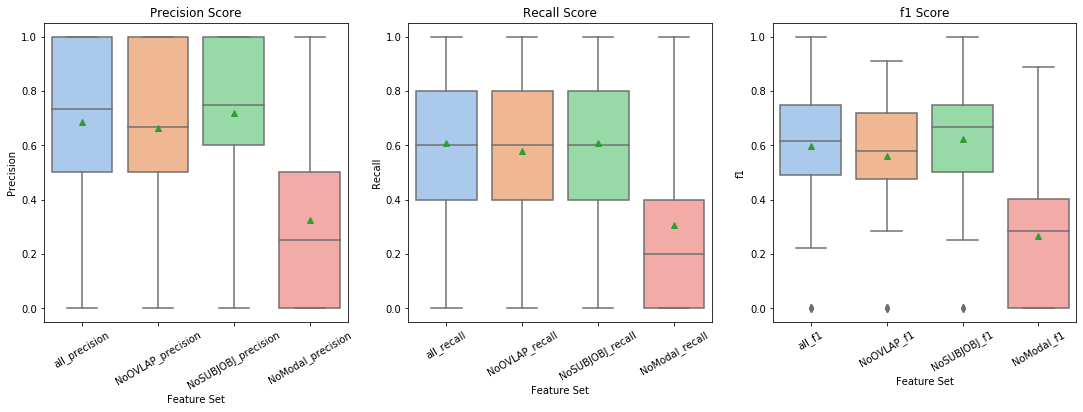

In [170]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation for SGD")
print()
print()
print()

print("------------------------")
print()
precision_data = pd.melt(df[['all_precision', 'NoOVLAP_precision', 'NoSUBJOBJ_precision', 'NoModal_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
print(stats.describe(df['all_precision']))
print(stats.describe(df['NoOVLAP_precision']))
print(stats.describe(df['NoSUBJOBJ_precision']))
print(stats.describe(df['NoModal_precision']))
print("------------------------")
print()
recall_data = pd.melt(df[['all_recall', 'NoOVLAP_recall', 'NoSUBJOBJ_recall', 'NoModal_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
print(stats.describe(df['all_recall']))
print(stats.describe(df['NoOVLAP_recall']))
print(stats.describe(df['NoSUBJOBJ_recall']))
print(stats.describe(df['NoModal_recall']))
print("------------------------")
print()
f1_data = pd.melt(df[['all_f1', 'NoOVLAP_f1', 'NoSUBJOBJ_f1', 'NoModal_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
print(stats.describe(df['all_f1']))
print(stats.describe(df['NoOVLAP_f1']))
print(stats.describe(df['NoSUBJOBJ_f1']))
print(stats.describe(df['NoModal_f1']))


In [171]:
all_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoOVLAP_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoSUBJOBJ_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoModal_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 10
clf = NearestCentroid()
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all = cross_validate(clf, X=xx, y=yy, cv=skf, scoring=myscores)
    nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=yy, cv=skf, scoring=myscores)
    nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=yy, cv=skf, scoring=myscores)
    nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=yy, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_scores[scr] = np.concatenate((all_scores[scr], nested_score_all['test_' + scr]), axis=None)
        NoOVLAP_scores[scr] = np.concatenate((NoOVLAP_scores[scr], nested_score_NoOVLAP['test_' + scr]), axis=None)
        NoSUBJOBJ_scores[scr] = np.concatenate((NoSUBJOBJ_scores[scr], nested_score_NoSUBJOBJ['test_' + scr]), axis=None)
        NoModal_scores[scr] = np.concatenate((NoModal_scores[scr], nested_score_NoModal['test_' + scr]), axis=None)

        
        
df = pd.DataFrame({'all_precision':all_scores['precision'], 'all_recall':all_scores['recall'], 'all_f1':all_scores['f1'],
                  'NoOVLAP_precision':NoOVLAP_scores['precision'], 'NoOVLAP_recall':NoOVLAP_scores['recall'], 'NoOVLAP_f1':NoOVLAP_scores['f1'],
                   'NoSUBJOBJ_precision':NoSUBJOBJ_scores['precision'], 'NoSUBJOBJ_recall':NoSUBJOBJ_scores['recall'], 'NoSUBJOBJ_f1':NoSUBJOBJ_scores['f1'],
                   'NoModal_precision':NoModal_scores['precision'], 'NoModal_recall':NoModal_scores['recall'], 'NoModal_f1':NoModal_scores['f1']})

Feature Set Evaluation for SGD



------------------------

DescribeResult(nobs=100, minmax=(0.2, 0.8), mean=0.45311763889705065, variance=0.014466170639819451, skewness=0.7761561835453606, kurtosis=0.39369562534797176)
DescribeResult(nobs=100, minmax=(0.13333333333333333, 0.6666666666666666), mean=0.3254079212840823, variance=0.006708462855883795, skewness=0.7140279717898779, kurtosis=2.08328187489922)
DescribeResult(nobs=100, minmax=(0.14285714285714285, 1.0), mean=0.4589894811071282, variance=0.026385193560350205, skewness=0.4578075859103334, kurtosis=0.4234079375947446)
DescribeResult(nobs=100, minmax=(0.0, 0.5714285714285714), mean=0.31246922027920476, variance=0.009637848246805364, skewness=0.1109605756920636, kurtosis=0.4838454165047201)
------------------------

DescribeResult(nobs=100, minmax=(0.4, 1.0), mean=0.846, variance=0.02412525252525253, skewness=-0.6809082180296668, kurtosis=-0.23243718501984345)
DescribeResult(nobs=100, minmax=(0.4, 1.0), mean=0.8059999999999999, var

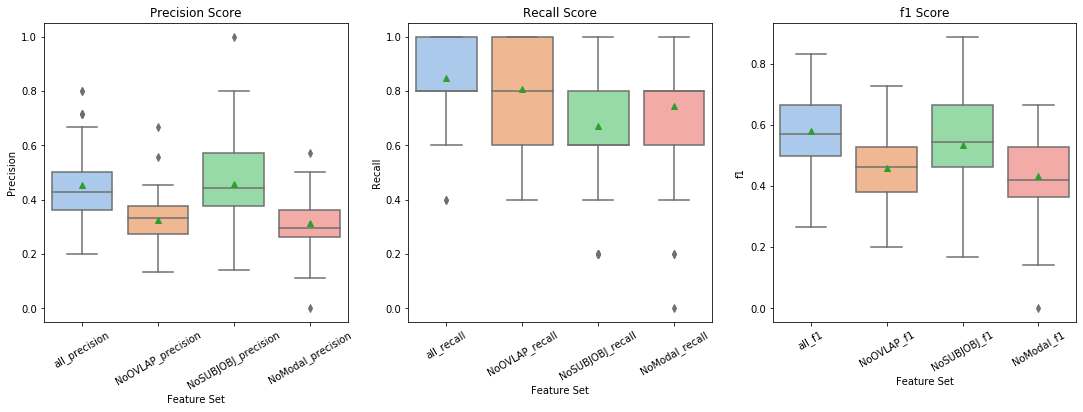

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation for SGD")
print()
print()
print()

print("------------------------")
print()
precision_data = pd.melt(df[['all_precision', 'NoOVLAP_precision', 'NoSUBJOBJ_precision', 'NoModal_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
print(stats.describe(df['all_precision']))
print(stats.describe(df['NoOVLAP_precision']))
print(stats.describe(df['NoSUBJOBJ_precision']))
print(stats.describe(df['NoModal_precision']))
print("------------------------")
print()
recall_data = pd.melt(df[['all_recall', 'NoOVLAP_recall', 'NoSUBJOBJ_recall', 'NoModal_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
print(stats.describe(df['all_recall']))
print(stats.describe(df['NoOVLAP_recall']))
print(stats.describe(df['NoSUBJOBJ_recall']))
print(stats.describe(df['NoModal_recall']))
print("------------------------")
print()
f1_data = pd.melt(df[['all_f1', 'NoOVLAP_f1', 'NoSUBJOBJ_f1', 'NoModal_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
print(stats.describe(df['all_f1']))
print(stats.describe(df['NoOVLAP_f1']))
print(stats.describe(df['NoSUBJOBJ_f1']))
print(stats.describe(df['NoModal_f1']))


In [173]:
all_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoOVLAP_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoSUBJOBJ_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoModal_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 10
clf = ensemble.ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all = cross_validate(clf, X=xx, y=yy, cv=skf, scoring=myscores)
    nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=yy, cv=skf, scoring=myscores)
    nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=yy, cv=skf, scoring=myscores)
    nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=yy, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_scores[scr] = np.concatenate((all_scores[scr], nested_score_all['test_' + scr]), axis=None)
        NoOVLAP_scores[scr] = np.concatenate((NoOVLAP_scores[scr], nested_score_NoOVLAP['test_' + scr]), axis=None)
        NoSUBJOBJ_scores[scr] = np.concatenate((NoSUBJOBJ_scores[scr], nested_score_NoSUBJOBJ['test_' + scr]), axis=None)
        NoModal_scores[scr] = np.concatenate((NoModal_scores[scr], nested_score_NoModal['test_' + scr]), axis=None)

        
        
df = pd.DataFrame({'all_precision':all_scores['precision'], 'all_recall':all_scores['recall'], 'all_f1':all_scores['f1'],
                  'NoOVLAP_precision':NoOVLAP_scores['precision'], 'NoOVLAP_recall':NoOVLAP_scores['recall'], 'NoOVLAP_f1':NoOVLAP_scores['f1'],
                   'NoSUBJOBJ_precision':NoSUBJOBJ_scores['precision'], 'NoSUBJOBJ_recall':NoSUBJOBJ_scores['recall'], 'NoSUBJOBJ_f1':NoSUBJOBJ_scores['f1'],
                   'NoModal_precision':NoModal_scores['precision'], 'NoModal_recall':NoModal_scores['recall'], 'NoModal_f1':NoModal_scores['f1']})

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precisio

Feature Set Evaluation for SGD



------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.8368571428571429, variance=0.03674940791131268, skewness=-1.2146604262034746, kurtosis=2.167933694623546)
DescribeResult(nobs=100, minmax=(0.5714285714285714, 1.0), mean=0.9091904761904762, variance=0.017686275452942123, skewness=-1.0523120593889856, kurtosis=-0.30055622557918626)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.8561428571428571, variance=0.03177811905907144, skewness=-1.6212004470559387, kurtosis=4.515776893375106)
DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.6489642857142858, variance=0.07787622984378938, skewness=-0.2880681873711606, kurtosis=-0.5019016661958404)
------------------------

DescribeResult(nobs=100, minmax=(0.0, 1.0), mean=0.618, variance=0.05260202020202021, skewness=-0.014972950744289745, kurtosis=-0.5605860008522656)
DescribeResult(nobs=100, minmax=(0.2, 1.0), mean=0.6979999999999997, variance=0.04726868686868689, skewness=-0.448402

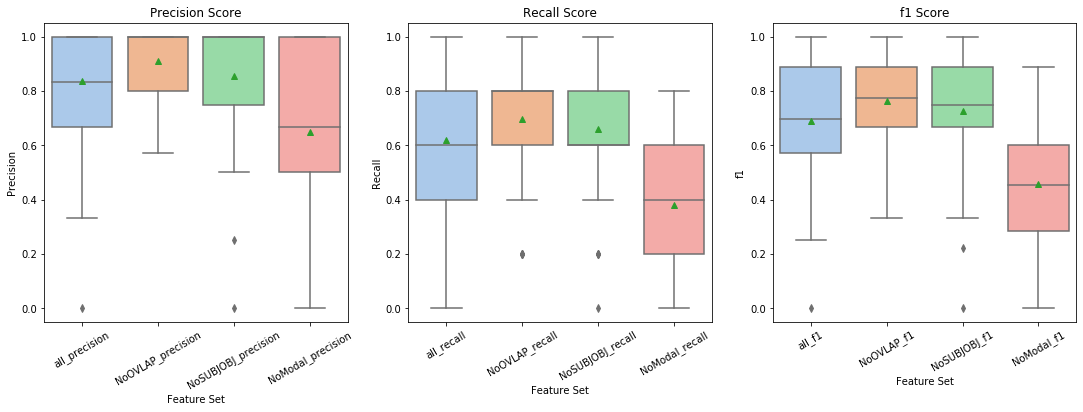

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation for SGD")
print()
print()
print()

print("------------------------")
print()
precision_data = pd.melt(df[['all_precision', 'NoOVLAP_precision', 'NoSUBJOBJ_precision', 'NoModal_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
print(stats.describe(df['all_precision']))
print(stats.describe(df['NoOVLAP_precision']))
print(stats.describe(df['NoSUBJOBJ_precision']))
print(stats.describe(df['NoModal_precision']))
print("------------------------")
print()
recall_data = pd.melt(df[['all_recall', 'NoOVLAP_recall', 'NoSUBJOBJ_recall', 'NoModal_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
print(stats.describe(df['all_recall']))
print(stats.describe(df['NoOVLAP_recall']))
print(stats.describe(df['NoSUBJOBJ_recall']))
print(stats.describe(df['NoModal_recall']))
print("------------------------")
print()
f1_data = pd.melt(df[['all_f1', 'NoOVLAP_f1', 'NoSUBJOBJ_f1', 'NoModal_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
print(stats.describe(df['all_f1']))
print(stats.describe(df['NoOVLAP_f1']))
print(stats.describe(df['NoSUBJOBJ_f1']))
print(stats.describe(df['NoModal_f1']))
